In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

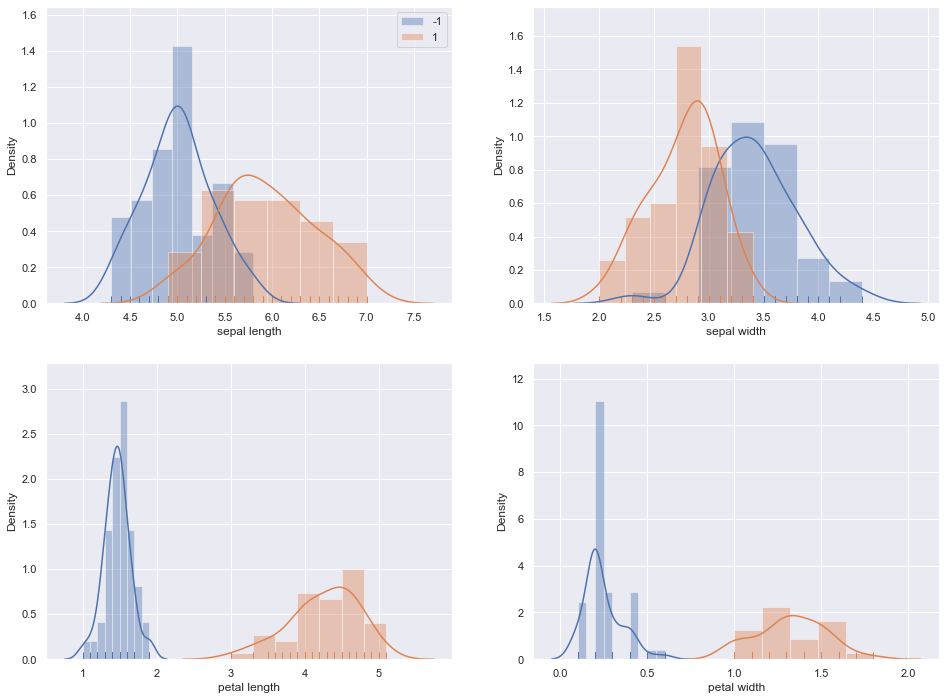

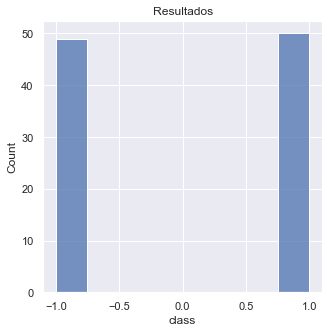

In [11]:
data = pd.read_csv('iris.data', sep=",")

data = data.dropna()
#print(data.columns)
data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]


data.loc[data['class'] == 'Iris-setosa', 'class'] = -1
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)

for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-setosa", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

#alphas = np.linspace(0, 1, 10)
alphas = np.linspace(1, 100000)

for a in alphas:
    perceptron = Perceptron(tol=None)
    perceptron.fit(X_train, y_train)

    train_acc = perceptron.score(X_train_vals, y_train_vals)
    val_acc = perceptron.score(X_val_vals, y_val_vals)
    test_acc = perceptron.score(X_test_vals, y_test_vals)
    
    print("\nTrain/Val/Test Accuracy Binaria (via Perceptron)\n")
    print(train_acc,val_acc,test_acc)

ValueError: Unknown label type: (array([-1, 1], dtype=object),)

### Referencias
#### Binaries

* No Dataset breast-cancer-wisconsin
Dataset iris 